In [ ]:
import numpy as np
import math
import os,sys,inspect
import random
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from Algorithm_2 import Algorithm_2, GetCoFromEigen
from Algorithm_3 import Algorithm_3
from func.Select_Index import Select_Columns, Select_Rows, Select_Ind
from func.Summation_Alg import GetCoFromEigen

import itertools 
from itertools import combinations, chain 

def findsubsets(r, n): 
    s = range(0, n)
    return list(itertools.combinations(s, r)) 

def Check_Best_CUR(A, k):
    
    ans = math.inf
    columns = []
    rows = []
    
    m = A.shape[0]
    n = A.shape[1]
    
    Cols = findsubsets(k, n)
    Rows = findsubsets(k, m)
    
    for col__ in Cols:
        for row__ in Rows:
            
            col = list(col__)
            row = list(row__)
            
            C  = Select_Columns(A, col)
            R  = Select_Rows(A, row)
            U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
            
            norm = np.linalg.norm(A - C @ U @ R,'fro')
            if(norm < ans):
                ans = norm
                columns = col
                rows = row
            
    return ans, columns, rows

In [ ]:
def GetKRank(m, n, k, a, b, distr):
    Z = np.zeros((m,n))
    for i in range(k):
        Z[i][i] = distr(a, b)
    U = np.random.uniform(a,b, (m,m))
    U = U @ U.T
    V = np.random.uniform(a,b, (n,n))
    V = V @ V.T
    return U @ Z @ V

In [7]:
m = 20
n = 30
rank = 3
A = GetKRank(m,n,rank,-1,1,np.random.uniform)

arrKR21 = []
arrER21 = []
arrTR21 = []

arrKR31 = []
arrER31 = []
arrTR31 = []
            
for k in range(5,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR21.append(k)
    time = end - start
    arrTR21.append(time.total_seconds())
    arrER21.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(5,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR31.append(k)
    time = end - start
    arrTR31.append(time.total_seconds())
    arrER31.append(np.linalg.norm(A - C@U@R, 'fro'))
rank = 5
A = GetKRank(m,n,rank,-1,1,np.random.uniform)

arrKR22 = []
arrER22 = []
arrTR22 = []

arrKR32 = []
arrER32 = []
arrTR32 = []


        
            
for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR22.append(k)
    time = end - start
    arrTR22.append(time.total_seconds())
    arrER22.append(np.linalg.norm(A - C@U@R, 'fro'))

for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR32.append(k)
    time = end - start
    arrTR32.append(time.total_seconds())
    arrER32.append(np.linalg.norm(A - C@U@R, 'fro'))
  

5
6


/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_2.py:54: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_2.py:54: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


7
8
9
10
11
12
13
14
15
16
17
18
19
5
6
7


/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_3.py:71: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_3.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


8
9
10
11
12
13
14
15
16
17
18
19
5
6
7
8
9
10
11
12
13
14
5
6
7
8
9
10
11
12
13
14


In [ ]:
np.savetxt("arrRK2_(20x30)_rank.txt", arrKR21, fmt="%s")
np.savetxt("arrRT2_(20x30)_rank.txt", arrTR21, fmt="%s")
np.savetxt("arrRE2_(20x30)_rank.txt", arrER21, fmt="%s")

np.savetxt("arrRK3_(20x30)_rank.txt", arrKR31, fmt="%s")
np.savetxt("arrRT3_(20x30)_rank.txt", arrTR31, fmt="%s")
np.savetxt("arrRE3_(20x30)_rank.txt", arrER31, fmt="%s")

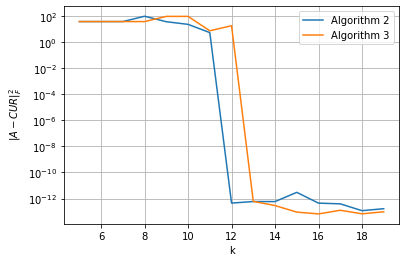

In [8]:
fig = plt.figure()
plt.plot(arrKR21,arrER21, label = "Algorithm 2")
plt.plot(arrKR31,arrER31, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel(" $\|A - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_rank_3_1.pdf', dpi=300)
plt.show()

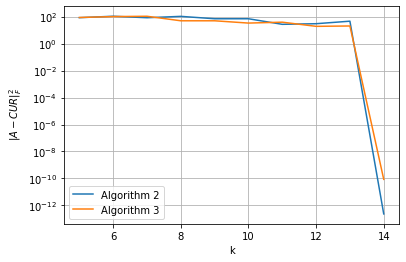

In [10]:
fig = plt.figure()
plt.plot(arrKR22,arrER22, label = "Algorithm 2")
plt.plot(arrKR32,arrER32, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel(" $\|A - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_rank_5_1.pdf', dpi=300)
plt.show()